In [ ]:
pip install tensorflow==2.12.0

In [ ]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

# importing data and storing them in data sets (4 arrays)
# helper function -> load_data()
# populating our data sets using helper function
# num_words = 10000 means that we will use most common 10,000 words and ignore the rest

In [ ]:
print(x_train[0])

# this is a review encoded(converted) into integer values
# each number is an encoded word and all of them combine together to form a review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(y_train[0])

# 0 represents a negative review
# 1 represents a positve review

1


In [ ]:
class_names = ['Negative', 'Positive']

# defining class names for our convenience to differentiate reviews
# this is only for our reference

In [ ]:
word_index = imdb.get_word_index()
print(word_index['hello'])

# keras provides a helper function that helps us identify the number of a encoded word
# helper function -> get_word_index()
# it is a dictionary with: words as keys, token number as values
# when the word we put in the helper function is tokenized, it gives the token in the output

1641221/1641221 [==============================] - 0s 0us/step
4822


In [ ]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):

    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '

    return text

# for decoding we will create a dictionary again where:
# word index values are keys and keys as values
# in the above cell, we used words as keys and token values as values
# in this cell we are reversing it and using index values of training data set as key and using it to find the corresponding value which is a review, i.e. a value

In [ ]:
decode(x_train[0])

# decoding the reviews are just for us to understand the reviews and to make sure that the labels that we have made fit well with the sentiment of the review or not
# the words are jumbled up and not in a sequence that we can understand but for a neural network, it does not matter

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
def show_len():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ', len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ', len(x_test[1]))

show_len()

# we have one problem with the reviews that all the reviews are of different lengths and there is no definitive shape(size of reviews) that we can provide to our network
# making a function to show the different lengths of the reviews just to show case this problem

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


In [ ]:
word_index['the']

# to overcome this problem of not having all reviews of same length, we can pad the reviews with unmeaningful words to make them all of the same length
# as this network trains it will assign some meaning to words which will help it to decide whether the reviews are positive or negative
# finding the numeric value of 'the' so we can pad our reviews with it to pad them and make them of same length

1

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

# keras provides us with a helper function to help us with review padding
# we will pad all our reviews with 'the' and make them of length 256 so that all reviews fall within this range and are of the same length
# padding = 'post' is added to tell to add 'the' at the end of the review
# maxlen = 256, this means to keep adding 'the' till our max length of our review is 256

In [ ]:
show_len()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [ ]:
decode(x_train[0])

# decoding the reviews after padding them with 'the' to increase their length
# decoding them here just to look at the padding

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
# when dealing with texts, we come across a lot of words
# one approach is to deal with each word separately and build our model like that
# every word will be it's own induvidual entity and it will not generalize because the algorithm will not be able to understand any feature correlation
# moreover, the algorithm will not be able to understand and capture the relationship between words since each word is dealt separately
# hence, we will use word embeddings so that our algorithm captures the relationship between words and learns things from our input text

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

# to create our model we will import Sequential class from keras and we will also import some layers that we will need
# in keras word embedding is given so we will use that to create word embedding
# 3 layers -> Dense, Embedding, GlobalAveragePooling1D
# Embedding can only be used as the first layer, an input layer
# we state how much vocabulary we want to declare and how many feautures we want to learn in this embedding (what the size of feauture vector should be in every word)
# we are using 16 dimensions for feature representation
# we used the Embedding layer with the dimension 10000, 16 where 16 was the dimension of the feature vector and 10000 was the number of words we restricted the corpus to
# then we need to use GlobalAveragePooling1D layer, which will convert our feature representation of 10,000 by 16 to a 16 dimension vector for each batch and then it can be fed into a dense layer
# output of Embedding layer goes to GlobalAveragePooling1D layer which creates a 16 dimensional vector for each training batch and then that is densely connected to the next layer and this layer has only 16 nodes
# another dense layer which will be our output layer and use the activation function 'sigmoid'
# sigmoid will give us a binary classification output for the 2 classes that we have
# using accuracy as a training metric

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

# we will also use a callback so that we can log out a dot so that we know that the training is underway
# epoch is the number of times you give data to the neural networks
# on_epoch_end -> this is triggered when an epoch ends
# in our example we are logging out a dot '.' to let us know that the training of the model is underway
# E -> number of epochs we are going to use

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

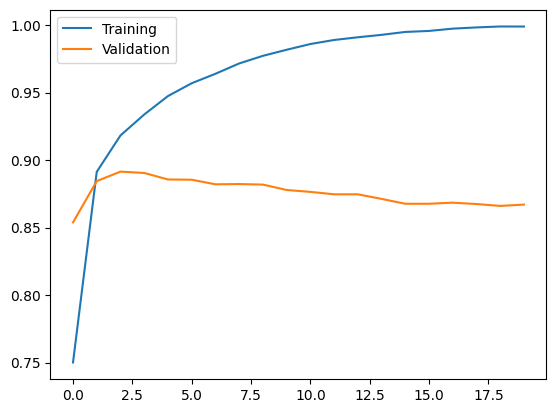

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

# we will use Map Plot Lib to display the accuracy of our model during training for both the training and the validation set
# we split the 20% of the training set into a validation set when we train the model
# validation set is the set of data that is held back from training the model so that it is used afterwards to find the optimal and best model
# when training the model on the training set, the model sometimes ends up memorising the data it is given a little bit that is why when the validation set is given to the model it performs(predicts) a little bad because it is not trained on that
# this is called overfitting

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)

# evaluating the trained model on the test set now

782/782 [==============================] - 1s 2ms/step - loss: 0.9689 - accuracy: 0.8408
Test set accuracy:  84.07599925994873


In [ ]:
import numpy as np

p = model.predict(np.expand_dims(x_test[0], axis = 0))
print(class_names[np.argmax(p[0])])

# taking a look at a text example and it's prediction
# np.expand_dims(x_test[0], we are expanding the dimension of x_test[0] because we are testing if our model is working or not, so we expand it otherwise all of the test set would have been used

Negative


In [ ]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the